In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

### Hypothesis testing.

**Step 1:**

Alternate hypothesis (Bold claim): H$_{1}$ $\rightarrow$ > , < , $\neq$

Null hypothesis (Status Quo): H$_{0}$ $\rightarrow$ $\le$ , $\ge$ , =

**Step 2:**

Collect the sample of size n.

Calculate the mean of sample $\bar{x}$

**Step 3:**

Compute test statistics.

If population variance is known then ,        

z = $\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$

If population variance is known then ,        

t = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

**Step 4:**

Decide the significance level $\alpha$. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

If test statistic is z-score -

**Two tailed z-test:**

|z| > z$_{\frac{\alpha}{2}}$ $\rightarrow$ Accept H$_{1}$ or reject H$_{0}$

**Right tailed test:**

|z| > z$_{\alpha}$ $\rightarrow$ Accept H$_{1}$ or reject H$_{0}$

**Left tailed test:**

|z| > -z$_{\alpha}$ $\rightarrow$ Accept H$_{1}$ or reject H$_{0}$

**Compute p-value P(Test statistics|H$_{0}$)**

**Two tailed test:**

p value = 2 * (1.0 - cdf(test statistics))

**One tailed test:**

p value = (1.0 - cdf(test statistics))

Now , 
        if(p-value < $\alpha$) $\rightarrow$ Accept H$_{1}$ or reject H$_{0}$


***Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?***

**Step 1:**

Alternate hypothesis (Bold claim): H$_{1}$ $\rightarrow$ **Each packet does not contain 500 grams of biryani.**

Null hypothesis (Status Quo): H$_{0}$ $\rightarrow$ **Each packet contain 500 grams of biryani.**

**Step 2:**

Collect the sample of size n = 10

[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

Compute sample mean 

$\bar{x}$ = 465.3

**Step 3:**

Compute test statistics.

Population variance is unknown, so calculate t score.

t = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

t = -1.2634751284446715

In [83]:
sample =[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
mean = sum(sample)/len(sample)
print(mean)

total=0
for i in range(10):
    total = total + abs(mean-sample[i])**2
s = (total/(len(sample)-1))**.5

465.3


In [84]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
def t_score(sample_size, sample_mean, pop_mean, s):
    numerator = sample_mean - pop_mean
    denomenator = s / sample_size**0.5
    return numerator / denomenator
t = t_score(sample_size, sample_mean, pop_mean, s)
print(t)

-1.2634751284446715


In [114]:
# Two tail
from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 19)

print(t_critical)

2.093024054408263


500


Text(465.3, 0.0007, 'x_bar')

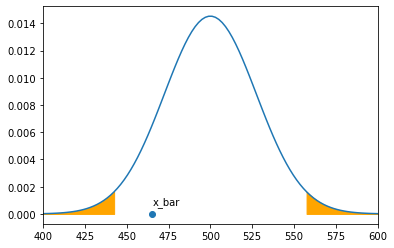

In [86]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean1 = pop_mean
print(mean1)
std = s / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean1, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)
   

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean1, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean1, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [87]:
# Conclusion using t test

if(abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [88]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818092
Fail to reject Null Hypothesis


**Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?**

**Step 1:**

Alternate hypothesis (Bold claim): H$_{1}$ $\rightarrow$ **Average rating given by the users is greater than 4.**

Null hypothesis (Status Quo): H$_{0}$ $\rightarrow$ **Average rating given by the users is less than equal to 4.**

**Step 2:**

Collect the sample of size n = 20

[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

Compute sample mean 

$\bar{x}$ = 4.25

**Step 3:**

Compute test statistics.

Population variance is unknown, so calculate t score.

t = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

t = 1.314

In [43]:
sample1 =[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
mean_1 = sum(sample1)/len(sample1)
total=0
for i in range(20):
    total = total + abs(mean_1-sample1[i])**2
s1 = (total/(len(sample1)-1))**0.5

In [97]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
def t_score(sample_size, sample_mean, pop_mean, s1):
    numerator = sample_mean - pop_mean
    denomenator = s1 / sample_size**0.5
    return numerator / denomenator
t1 = t_score(sample_size, sample_mean, pop_mean, s1)
print(t1)

1.3142574813455419


In [98]:
# One tail
from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


Text(4.25, 0.1, 'x_bar')

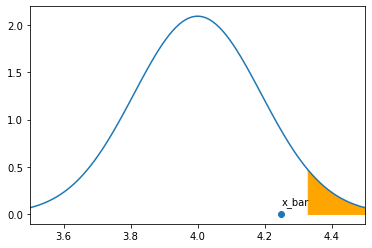

In [99]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean2 = pop_mean
std = s1 / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean2, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean2, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [100]:
# Conclusion using t test

if(t1 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [101]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t1))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?**

**Step 1:**

Alternate hypothesis (Bold claim): H$_{1}$ $\rightarrow$ **Average the SUV's mileage is greater than 15 km/litre**

Null hypothesis (Status Quo): H$_{0}$ $\rightarrow$ **Average the SUV's mileage is less than equal to 15 km/litre.**

**Step 2:**

Collect the sample of size n = 20

[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43,15.46, 13.88, 14.31, 14.41, 15.76, 15.38]

Compute sample mean 

$\bar{x}$ = 

**Step 3:**

Compute test statistics.

Population variance is unknown, so calculate t score.

t = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

t = 1.314

In [48]:
sample2 =[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43,15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
mean_2 = sum(sample2)/len(sample2)
print(mean_2)
total=0
for i in range(20):
    total = total + abs(mean_2-sample2[i])**2
s2 = (total/(len(sample2)-1))**0.5
print(s2)

15.098999999999998
1.0253671999517255


In [103]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
def t_score(sample_size, sample_mean, pop_mean, s2):
    numerator = sample_mean - pop_mean
    denomenator = s2 / sample_size**0.5
    return numerator / denomenator
t2 = t_score(sample_size, sample_mean, pop_mean, s2)
print(t2)

0.4361496988795929


In [102]:
# One tail
from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


Text(15.1, 0.1, 'x_bar')

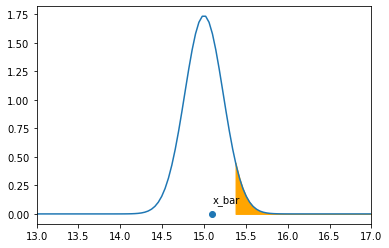

In [51]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean3 = pop_mean
std = s2 / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean3, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean3, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [104]:
if(t2 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [106]:
p_value = 1.0 - norm.cdf(np.abs(t2))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33136406031033616
Fail to reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? **

**Step 1:**

Alternate hypothesis (Bold claim): H$_{1}$ $\rightarrow$ **On average it takes less than 100 ms**

Null hypothesis (Status Quo): H$_{0}$ $\rightarrow$ **On average it takes greater than equal to 100 ms.**

**Step 2:**

Collect the sample of size n = 10

[96, 98, 95, 100, 101, 103, 107, 105, 106, 104]

Compute sample mean 

$\bar{x}$ = 101.5

**Step 3:**

Compute test statistics.

Population variance is unknown, so calculate t score.

t = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

t = 1.130

In [55]:
sample3 =[96, 98, 95, 100, 101, 103, 107, 105, 106, 104]
mean_3 = sum(sample3)/len(sample3)
print(mean_3)
total=0
for i in range(10):
    total = total + abs(mean_3-sample3[i])**2
s3 = (total/(len(sample3)-1))**0.5
print(s3)

101.5
4.196559437338057


In [108]:
sample_size = 10
sample_mean = 101.5
pop_mean = 100
def t_score(sample_size, sample_mean, pop_mean, s3):
    numerator = sample_mean - pop_mean
    denomenator = s3 / sample_size**0.5
    return numerator / denomenator
t3 = t_score(sample_size, sample_mean, pop_mean, s3)
print(t3)

1.1303108084324887


In [109]:
# One tail
from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


Text(101.5, 0.02, 'x_bar')

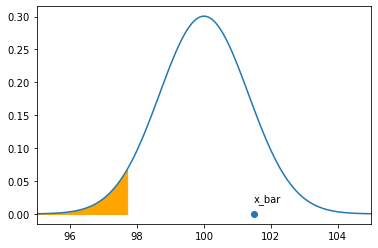

In [110]:
x_min = 95
x_max = 105

mean4 = pop_mean
std = s3 / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean4, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean4, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [112]:
if(t3 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [113]:
p_value = 1.0 - norm.cdf(np.abs(t3))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.1291726408928734
Fail to reject Null Hypothesis
